In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_csv("./imdb_top_1000.csv")
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [86]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [87]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [88]:
filtered= df['Director'].isin(['Christopher Nolan'])
df[filtered]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195"
21,https://m.media-amazon.com/images/M/MV5BZjdkOT...,Interstellar,2014,UA,169 min,"Adventure, Drama, Sci-Fi",8.6,A team of explorers travel through a wormhole ...,74.0,Christopher Nolan,Matthew McConaughey,Anne Hathaway,Jessica Chastain,Mackenzie Foy,1512360,"188,020,017"
36,https://m.media-amazon.com/images/M/MV5BMjA4ND...,The Prestige,2006,U,130 min,"Drama, Mystery, Sci-Fi",8.5,"After a tragic accident, two stage magicians e...",66.0,Christopher Nolan,Christian Bale,Hugh Jackman,Scarlett Johansson,Michael Caine,1190259,"53,089,891"
63,https://m.media-amazon.com/images/M/MV5BMTk4OD...,The Dark Knight Rises,2012,UA,164 min,"Action, Adventure",8.4,Eight years after the Joker's reign of anarchy...,78.0,Christopher Nolan,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,1516346,"448,139,099"
69,https://m.media-amazon.com/images/M/MV5BZTcyNj...,Memento,2000,UA,113 min,"Mystery, Thriller",8.4,A man with short-term memory loss attempts to ...,80.0,Christopher Nolan,Guy Pearce,Carrie-Anne Moss,Joe Pantoliano,Mark Boone Junior,1125712,"25,544,867"
155,https://m.media-amazon.com/images/M/MV5BOTY4Yj...,Batman Begins,2005,UA,140 min,"Action, Adventure",8.2,"After training with his mentor, Batman begins ...",70.0,Christopher Nolan,Christian Bale,Michael Caine,Ken Watanabe,Liam Neeson,1308302,"206,852,432"
573,https://m.media-amazon.com/images/M/MV5BN2YyZj...,Dunkirk,2017,UA,106 min,"Action, Drama, History",7.8,"Allied soldiers from Belgium, the British Empi...",94.0,Christopher Nolan,Fionn Whitehead,Barry Keoghan,Mark Rylance,Tom Hardy,555092,"188,373,161"


In [89]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [90]:
df['Gross']

0       28,341,469
1      134,966,411
2      534,858,444
3       57,300,000
4        4,360,000
          ...     
995            NaN
996            NaN
997     30,500,000
998            NaN
999            NaN
Name: Gross, Length: 1000, dtype: object

In [91]:
df['Gross'].fillna(value=0, inplace=True)
df['Gross']

0       28,341,469
1      134,966,411
2      534,858,444
3       57,300,000
4        4,360,000
          ...     
995              0
996              0
997     30,500,000
998              0
999              0
Name: Gross, Length: 1000, dtype: object

In [92]:
df['Gross'] = df['Gross'].str.replace(',', '')

In [93]:
#df['Gross'] = df['Gross'].astype(float)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

In [94]:
df['Gross'].fillna(df.groupby('Director')['Gross'].transform('mean'), inplace=True)

In [95]:
df['Gross'].fillna(df.groupby('Genre')['Gross'].transform('mean'), inplace=True)

In [96]:
df['Gross'].fillna(df['Gross'].mean(), inplace=True)

In [97]:
gross = np.array(df['Gross'])
gross

array([2.83414690e+07, 1.34966411e+08, 5.34858444e+08, 5.73000000e+07,
       4.36000000e+06, 3.77845905e+08, 1.07928762e+08, 9.68988180e+07,
       2.92576195e+08, 3.70301020e+07, 3.15544750e+08, 3.30252182e+08,
       6.10000000e+06, 3.42551365e+08, 1.71479930e+08, 4.68363940e+07,
       2.90475067e+08, 1.12000000e+08, 5.53895011e+07, 5.33678440e+07,
       2.83064451e+07, 1.88020017e+08, 7.56339700e+06, 1.00558590e+07,
       2.16540909e+08, 1.36801374e+08, 5.75982470e+07, 1.00125643e+08,
       1.30742922e+08, 3.22740140e+08, 6.21487718e+07, 2.69061000e+05,
       6.98000000e+06, 3.35451311e+08, 1.30920000e+07, 1.31822810e+07,
       5.30898910e+07, 1.32384315e+08, 3.25725770e+07, 1.87705427e+08,
       6.71986400e+06, 2.33415680e+07, 1.95012380e+07, 4.22783777e+08,
       2.04843350e+08, 1.19904010e+07, 9.80109000e+05, 2.10609762e+08,
       5.32150800e+06, 3.20000000e+07, 1.02456000e+06, 1.63245000e+05,
       1.91810000e+04, 1.66109600e+06, 5.53895011e+07, 5.21493483e+07,
      

In [98]:
df['Runtime']

0      142 min
1      175 min
2      152 min
3      202 min
4       96 min
        ...   
995    115 min
996    201 min
997    118 min
998     97 min
999     86 min
Name: Runtime, Length: 1000, dtype: object

In [99]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross              0
dtype: int64

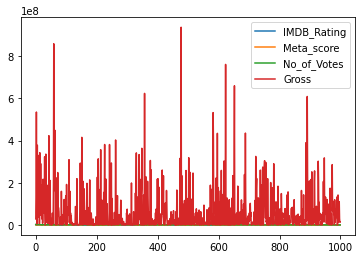

In [100]:
df.plot()

Text(0, 0.5, 'No_of_Votes')

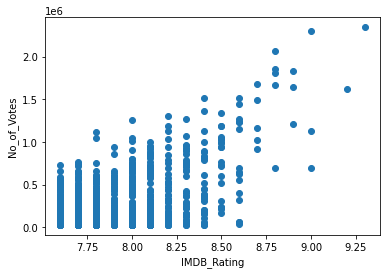

In [101]:
plt.scatter(x=df['IMDB_Rating'],y=df['No_of_Votes'])
plt.xlabel("IMDB_Rating")
plt.ylabel("No_of_Votes")

In [102]:
df['Runtime'] = df['Runtime'].map(lambda x: x.rstrip(' min'))
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [103]:
df['Runtime']=df['Runtime'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   int64  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          1000 non-null   float64
dtypes: float64(3), int64(2), object(11)
memory usage: 125.1+ KB


In [104]:
df['Genre'].unique()

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Action, Adventure, Drama', 'Biography, Drama, History',
       'Action, Adventure, Sci-Fi', 'Drama, Romance', 'Western',
       'Action, Sci-Fi', 'Biography, Crime, Drama',
       'Action, Adventure, Fantasy', 'Comedy, Drama, Thriller',
       'Adventure, Drama, Sci-Fi', 'Animation, Adventure, Family',
       'Drama, War', 'Crime, Drama, Fantasy', 'Comedy, Drama, Romance',
       'Crime, Drama, Mystery', 'Crime, Drama, Thriller',
       'Action, Drama, Mystery', 'Drama, Family, Fantasy', 'Drama, Music',
       'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi',
       'Biography, Drama, Music', 'Crime, Mystery, Thriller',
       'Animation, Adventure, Drama', 'Animation, Drama, War',
       'Adventure, Comedy, Sci-Fi', 'Horror, Mystery, Thriller',
       'Drama, Romance, War', 'Comedy, Drama, Family',
       'Animation, Drama, Fantasy', 'Action, Biography, Drama',
       'Animation, Action, Adventure', 'Drama, Western',


In [105]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [106]:
genre = np.array(df["Genre"])
new_genre = []
length=0
for i in genre:
#     print(i)
    # new_genre.append(np.char.split(i,sep=", "))
    list1= i.split(',')
    length = max(length,len(list1))
    new_genre.append(list1)
# print(length)    
new_genre

[['Drama'],
 ['Crime', ' Drama'],
 ['Action', ' Crime', ' Drama'],
 ['Crime', ' Drama'],
 ['Crime', ' Drama'],
 ['Action', ' Adventure', ' Drama'],
 ['Crime', ' Drama'],
 ['Biography', ' Drama', ' History'],
 ['Action', ' Adventure', ' Sci-Fi'],
 ['Drama'],
 ['Action', ' Adventure', ' Drama'],
 ['Drama', ' Romance'],
 ['Western'],
 ['Action', ' Adventure', ' Drama'],
 ['Action', ' Sci-Fi'],
 ['Biography', ' Crime', ' Drama'],
 ['Action', ' Adventure', ' Fantasy'],
 ['Drama'],
 ['Biography', ' Drama', ' History'],
 ['Comedy', ' Drama', ' Thriller'],
 ['Drama'],
 ['Adventure', ' Drama', ' Sci-Fi'],
 ['Crime', ' Drama'],
 ['Animation', ' Adventure', ' Family'],
 ['Drama', ' War'],
 ['Crime', ' Drama', ' Fantasy'],
 ['Comedy', ' Drama', ' Romance'],
 ['Crime', ' Drama', ' Mystery'],
 ['Crime', ' Drama', ' Thriller'],
 ['Action', ' Adventure', ' Fantasy'],
 ['Action', ' Drama', ' Mystery'],
 ['Action', ' Adventure', ' Drama'],
 ['Drama', ' Family', ' Fantasy'],
 ['Crime', ' Drama', ' Thrill

[]

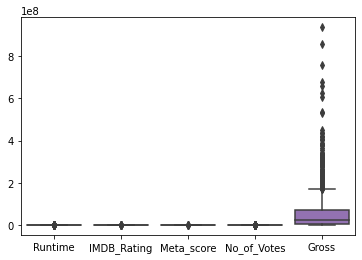

In [107]:
sns.boxplot(data=df)
plt.plot()

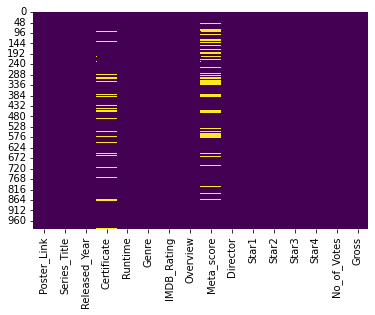

In [108]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [109]:
df.describe()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.000000,1000.000000,843.000000,1.000000e+03,1.000000e+03
mean,122.891000,7.949300,77.971530,2.736929e+05,6.238573e+07
std,28.093671,0.275491,12.376099,3.273727e+05,1.025755e+08
min,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,103.000000,7.700000,70.000000,5.552625e+04,3.459195e+06
50%,119.000000,7.900000,79.000000,1.385485e+05,2.442770e+07
75%,137.000000,8.100000,87.000000,3.741612e+05,7.029628e+07
max,321.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


In [110]:
print("meta score = variance",df["Meta_score"].var())
print("imdb = variance",df["IMDB_Rating"].var())
print("runtime = variance",df["Runtime"].var())

meta score = variance 153.16783459142357
imdb = variance 0.07589540540540543
runtime = variance 789.2543733733734


In [111]:
from scipy.stats import skew
import pylab as p
y1 = df['Gross']
print("skewness",skew(y1))

skewness 3.351483349537646


In [112]:
#Values counts
print("Certificate:\n",df['Certificate'].value_counts())

Certificate:
 U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: Certificate, dtype: int64


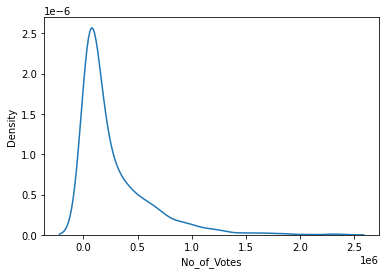

In [113]:
sns.kdeplot(x=df['No_of_Votes'])

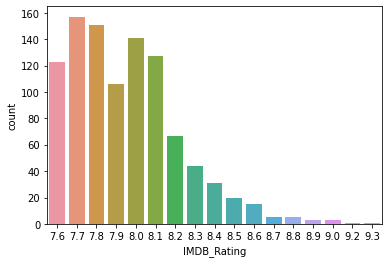

In [114]:
sns.countplot(x='IMDB_Rating',data=df,)
plt.show()

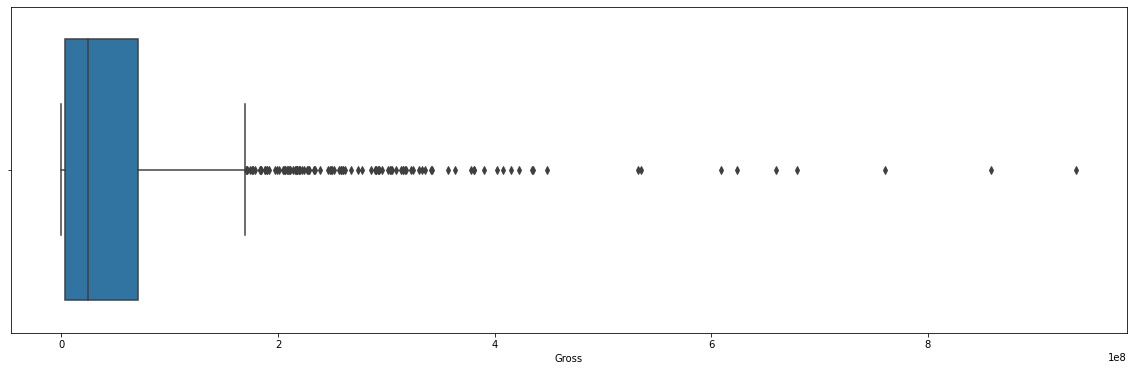

In [115]:
plt.figure(figsize=(20,6))
sns.boxplot(x=df['Gross'])

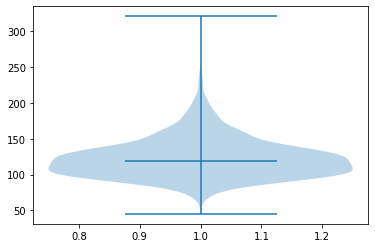

In [116]:
plt.violinplot(df['Runtime'].values,showmedians=True)
plt.show()

## Bivariate analysis


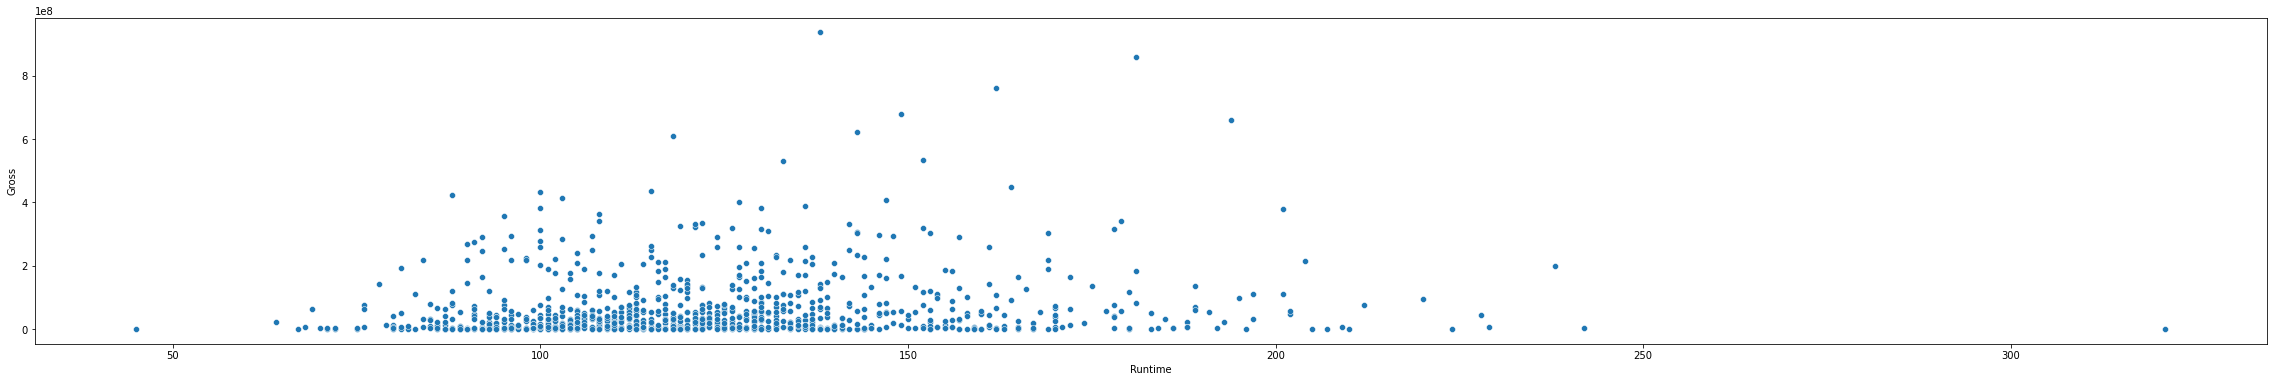

In [117]:
df2= df.sort_values(by='Runtime',ascending=True)
plt.figure(figsize=(40,6))
sns.scatterplot(data=df2, x="Runtime", y="Gross")
plt.show()

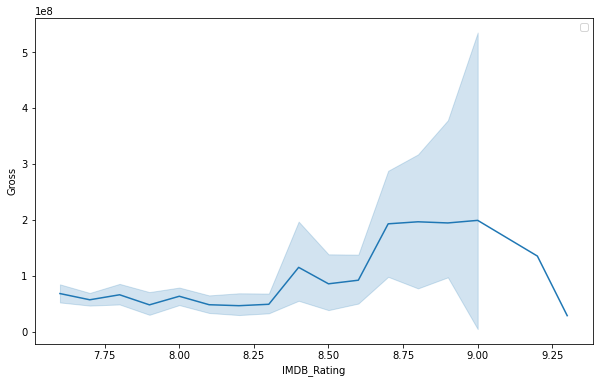

In [118]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df,y="Gross", x="IMDB_Rating")
plt.legend()

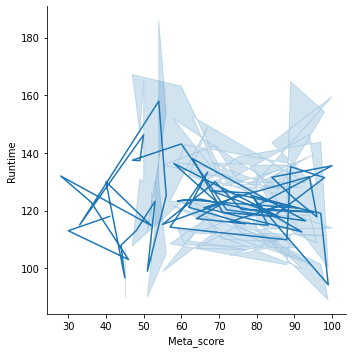

In [119]:
sns.relplot(x=df["Meta_score"],y=df["Runtime"],sort=False,kind = "line", data = df)

In [120]:
df['Meta_score']= df['Meta_score'].fillna(np.average(df['Meta_score']).astype(np.float64))

In [121]:
df["Certificate"]=df['Certificate'].fillna("U/A")

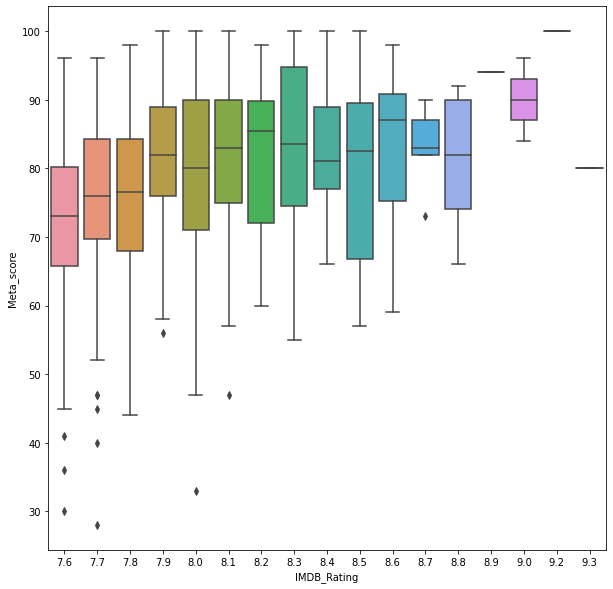

In [122]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df["IMDB_Rating"],y=df["Meta_score"],data =df)

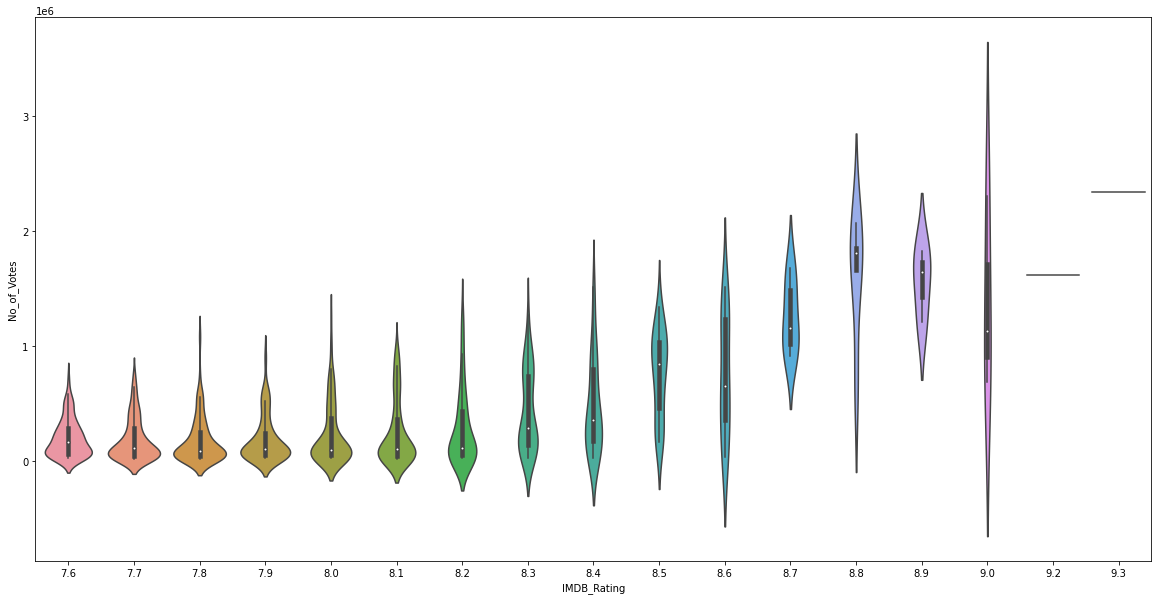

In [123]:
plt.figure(figsize=(20,10))
sns.violinplot(x=df['IMDB_Rating'],y=df["No_of_Votes"],data=df)

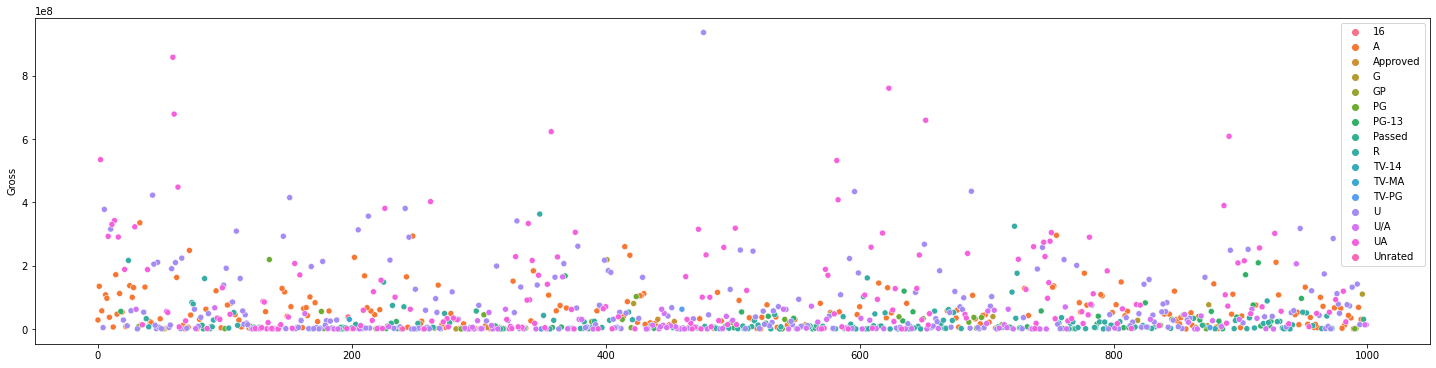

In [124]:
plt.figure(figsize=(25,6))
df2 = df.sort_values('Certificate')
sns.scatterplot(x=df2.index,y=df2['Gross'],hue=df2['Certificate'])
plt.legend()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


16.18468928198243

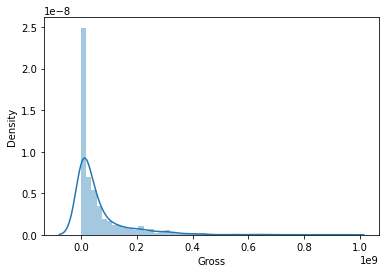

In [125]:
import seaborn as sns
sns.distplot(df['Gross'], hist=True, kde=True)
df['Gross'].kurt() 

**MULTIVARIATE ANALYSIS**

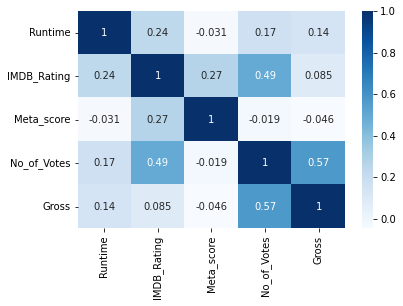

In [126]:
sns.heatmap(df.corr(),cbar=True, annot =True, cmap ='Blues')

In [127]:
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,2.834147e+07
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,1.349664e+08
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,5.348584e+08
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,5.730000e+07
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4.360000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,3.024719e+07
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,1.101271e+08
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,3.050000e+07
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,U/A,97,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,1.323438e+07


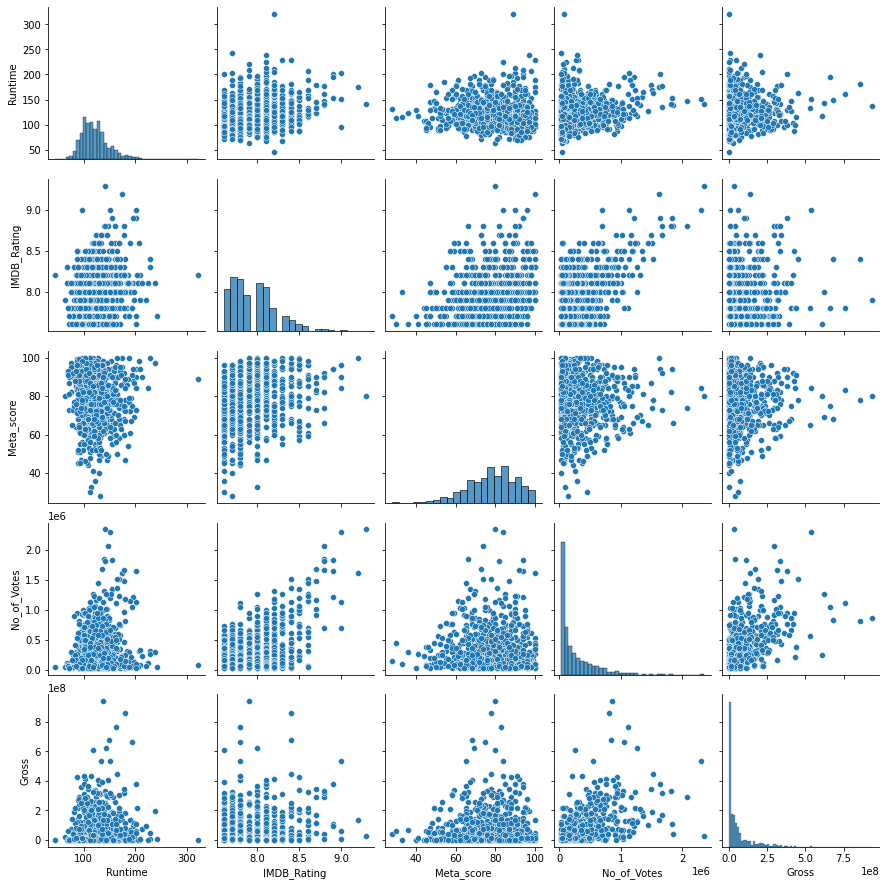

In [128]:
sns.pairplot(df)

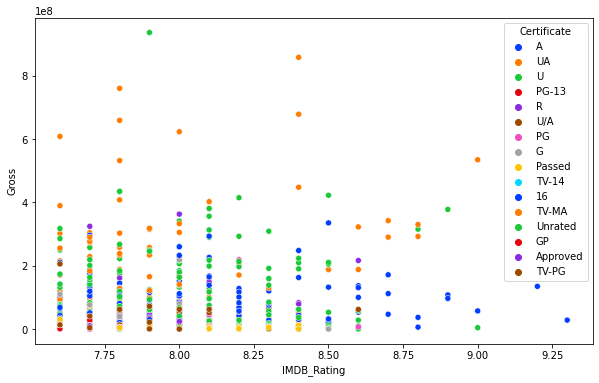

In [129]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='IMDB_Rating',y='Gross',data=df, hue='Certificate', palette='bright')

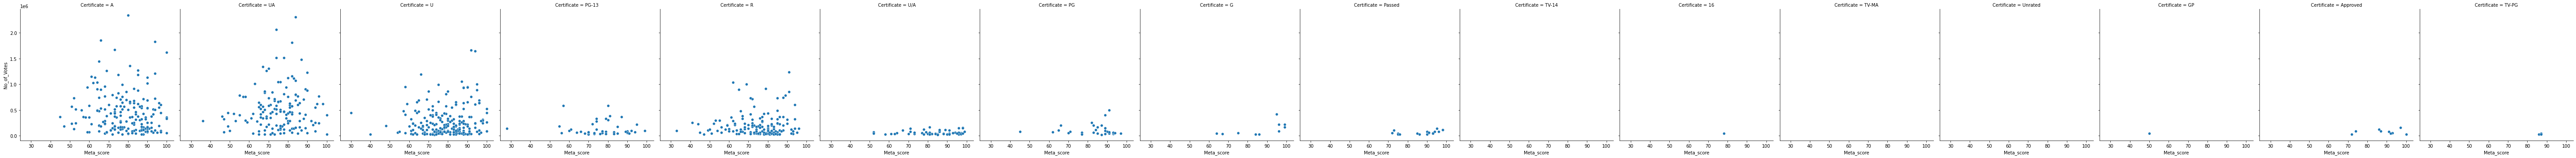

In [130]:
sns.relplot(data=df, x='Meta_score', y='No_of_Votes',col='Certificate')

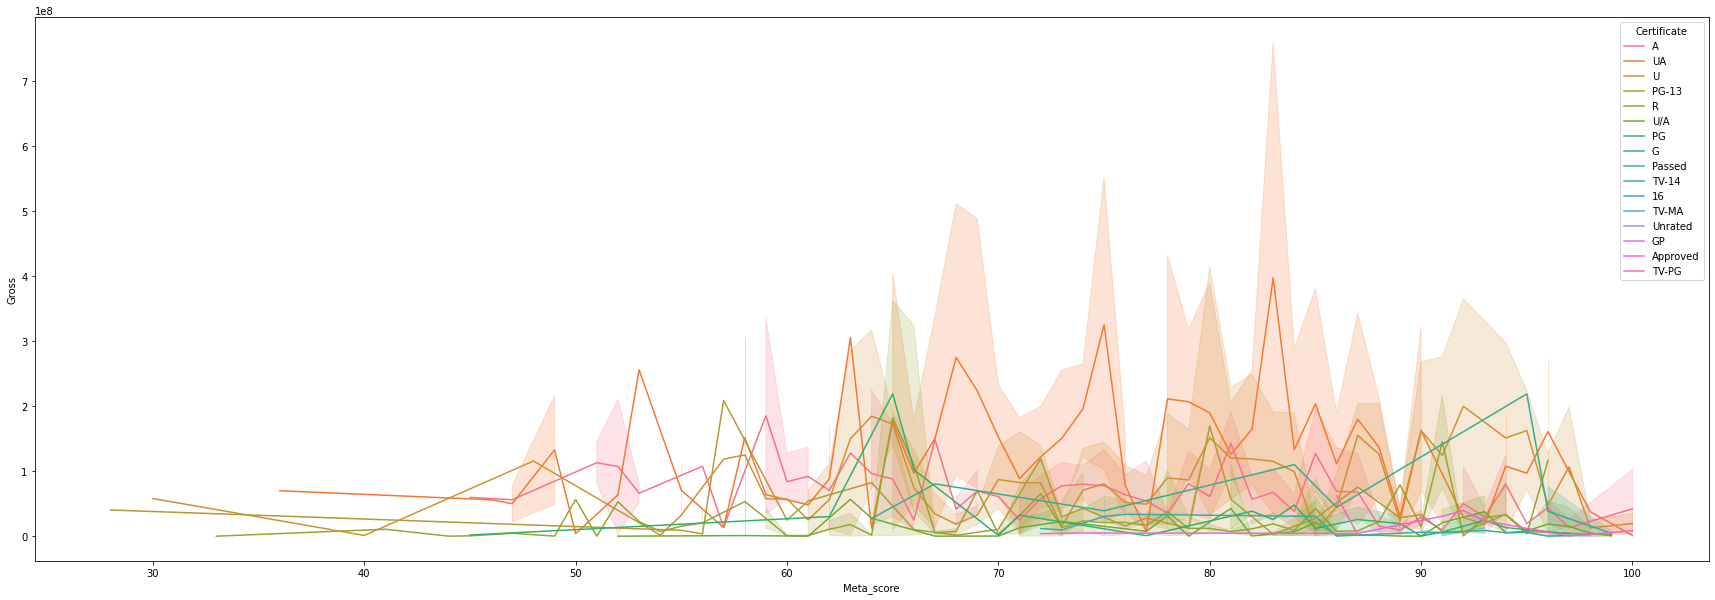

In [131]:
plt.figure(figsize=(30,10))
sns.lineplot(x=df["Meta_score"],y=df["Gross"],hue=df["Certificate"])

In [132]:
X = df.iloc[:, 8].values
y = df.iloc[:, 15].values
y = np.array(y)
print(X)
print("_____________________")
print(y)

[ 80. 100.  84.  90.  96.  94.  94.  94.  74.  66.  92.  82.  90.  87.
  73.  90.  82.  83.  90.  96.  nan  74.  79.  96.  91.  61.  59.  65.
  85.  90.  85.  98.  89.  59.  88.  57.  66.  85.  85.  67.  62.  77.
  64.  88.  75.  80.  94.  87.  80.  97. 100.  96.  99.  75.  nan  nan
  79.  nan  87.  78.  68.  81.  81.  78.  67.  nan  95.  89.  77.  80.
  76.  nan  85.  66.  94.  89.  nan  nan  97.  nan  90. 100.  nan  nan
  78.  nan  nan  nan  77.  95.  80.  nan  nan  69.  89.  69.  55.  68.
  84.  70.  77.  95.  68.  79.  76.  nan  84.  88.  65.  58.  86.  94.
  83.  77.  84.  74. 100.  94.  98. 100.  99.  nan  nan  95. 100.  nan
  98.  nan  nan  nan  nan  69.  88.  nan  nan  65.  nan  nan  73.  nan
  89.  nan  nan  80.  71.  63.  88.  75.  68.  93.  98.  92.  62.  nan
  nan  70.  nan  82.  80.  72.  nan  66.  90.  nan  76.  73.  nan  85.
  65.  nan  86.  72.  96.  89.  nan  nan  nan  nan  91.  86.  88.  nan
  60.  98.  88.  88.  97.  75.  nan  98.  98.  98.  86.  nan  nan  95.
  nan 

In [133]:
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X = sc_X.fit_transform(X.reshape(-1,1))
# y = sc_y.fit_transform(y.reshape(-1,1))

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [135]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

ValueError: ignored

In [136]:
y_pred = regressor.predict(X_test)
# y_pred=y_pred.reshape(1,-1)
# y_pred = sc_y.inverse_transform(y_pred)

NotFittedError: ignored

In [ ]:
print(y_pred)

In [ ]:
from sklearn.metrics import accuracy_score,mean_squared_error
# accuracy_score(y_test,y_pred.reshape(-1,1))*100 
score = mean_squared_error(y_test,y_pred.reshape(-1,1))
print(score)
# regressor.score(y_pred.reshape(-1,1),y_test)

In [ ]:
# df2 = pd.DataFrame({'Real Values':sc_y.inverse_transform(y_test.reshape(-1)), 'Predicted Values':y_pred})
# df2

In [ ]:
# X_grid = np.arange(min(X), max(X), 0.1)
# X_grid = X_grid.reshape((len(X_grid), 1))
# plt.scatter(sc_X.inverse_transform(X_test), sc_y.inverse_transform(y_test.reshape(-1)), color = 'red')
# plt.scatter(sc_X.inverse_transform(X_test), y_pred, color = 'green')plt.title('SVR Regression')
# plt.xlabel('Position level')
# plt.ylabel('Salary')
# plt.show()